# Exercise 5: Implement the PCA Class
5.2) Test the PCA class in a jupyter notebook using the iris.csv dataset (classificação).

In [1]:
from si.io.csv_file import read_csv
from si.data.dataset import Dataset

# Load iris dataset
iris = read_csv("../datasets/iris/iris.csv",features=True, label=True)

print("Dataset has label?:",iris.has_label())
print("Label:", iris.label)
print("Label classes:",iris.get_classes())
print("Features:", iris.features)
print("Shape of dataset:", iris.shape())

iris = Dataset(X=iris.X, y=iris.y, features=iris.features, label=iris.label)

Dataset has label?: True
Label: class
Label classes: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Features: Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')
Shape of dataset: (150, 4)


### Implementing PCA with 2 principal components

In [2]:
from si.decomposition.pca import PCA

# PCA with 2 components
pca = PCA(n_components=2)
pca.fit(iris)

In [3]:
# Transform the dataset
iris_reduced = pca.transform(iris)

# Display the results
print(f"Principal Components (Eigenvectors): \n{pca.components}")
print(f"\nExplained Variance (Proportion): \n{pca.explained_variance}")
print(f"\nReduced Dataset (first 5 samples): \n{iris_reduced.X[:5]}")
print(f"\nFeature Names of the Reduced Dataset: \n{iris_reduced.features}")

Principal Components (Eigenvectors): 
[[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [-0.65653988 -0.72971237  0.1757674   0.07470647]]

Explained Variance (Proportion): 
[0.92461621 0.05301557]

Reduced Dataset (first 5 samples): 
[[-8.19555022  4.98811642]
 [-8.22673371  5.48428058]
 [-8.40116264  5.45206934]
 [-8.2577803   5.62584805]
 [-8.23993608  4.98079917]]

Feature Names of the Reduced Dataset: 
['PC1', 'PC2']


### PCA Visualization with 2 principal components

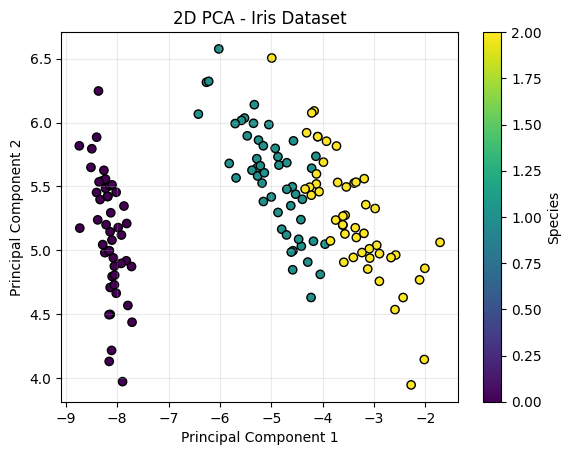

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Map categorical labels to numerical values
label_mapping = {label: idx for idx, label in enumerate(iris.get_classes())}
numerical_labels = np.array([label_mapping[label] for label in iris.y])

# Scatter plot of the reduced dataset
plt.scatter(iris_reduced.X[:, 0], iris_reduced.X[:, 1], c=numerical_labels, cmap='viridis', edgecolors='black')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA - Iris Dataset')
plt.colorbar(label='Species')
plt.grid(alpha=0.25)
plt.show()

### Implementing PCA with 3 principal components

In [5]:
# PCA with 3 components
pca = PCA(n_components=3)
pca.fit(iris)

In [6]:
# Transform the dataset
iris_reduced = pca.transform(iris)

# Display the results
print(f"Principal Components (Eigenvectors): \n{pca.components}")
print(f"\nExplained Variance (Proportion): \n{pca.explained_variance}")
print(f"\nReduced Dataset (first 5 samples): \n{iris_reduced.X[:5]}")
print(f"\nFeature Names of the Reduced Dataset: \n{iris_reduced.features}")

Principal Components (Eigenvectors): 
[[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [-0.65653988 -0.72971237  0.1757674   0.07470647]
 [-0.58099728  0.59641809  0.07252408  0.54906091]]

Explained Variance (Proportion): 
[0.92461621 0.05301557 0.01718514]

Reduced Dataset (first 5 samples): 
[[ 2.82713597 -5.64133105 -0.66427693]
 [ 2.79595248 -5.14516688 -0.84628652]
 [ 2.62152356 -5.17737812 -0.61805585]
 [ 2.7649059  -5.00359942 -0.60509312]
 [ 2.78275012 -5.64864829 -0.54653539]]

Feature Names of the Reduced Dataset: 
['PC1', 'PC2', 'PC3']


### PCA Visualization with 3 principal components

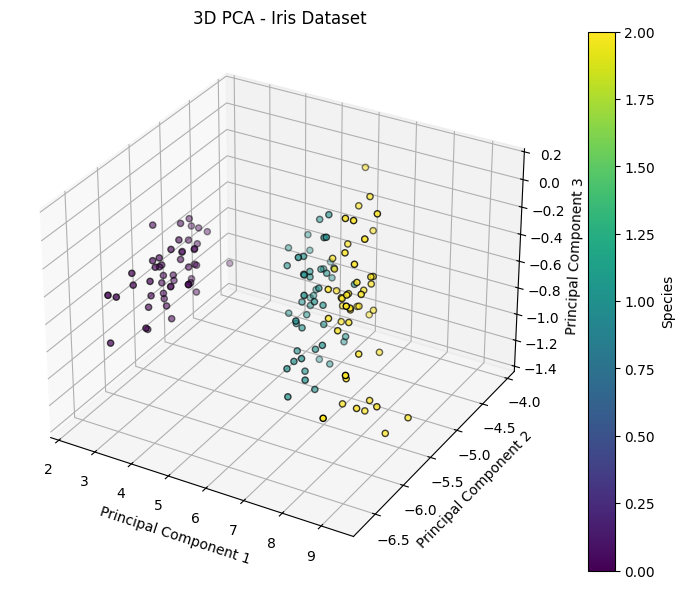

In [7]:
from mpl_toolkits.mplot3d import Axes3D  # Import for 3D plotting

# Map categorical labels to numerical values
label_mapping = {label: idx for idx, label in enumerate(iris.get_classes())}
numerical_labels = np.array([label_mapping[label] for label in iris.y])

# 3D Scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(iris_reduced.X[:, 0], iris_reduced.X[:, 1], iris_reduced.X[:, 2], c=numerical_labels, cmap='viridis', edgecolors='black')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA - Iris Dataset')
colorbar = fig.colorbar(scatter, ax=ax, label='Species')
ax.grid(alpha=0.25)
plt.show()